Define functional categories and filter calls for those in Control and SCZ individuals

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from matplotlib import pyplot as plt
import pandas as pd
import attila_utils
import funcvar
import functools
import ensembl_rest
import os.path
from bsmcalls import SNPnexus
from bsmcalls import operations
%matplotlib inline
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', -1)

## Preparations

In [2]:
data = SNPnexus.load_data('/home/attila/projects/bsm/results/2020-09-07-annotations/annotated-calls.p')

### GWAS genes

Here we take supplementary table 4 from the [CLOZUK paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5918692/) (clozapine UK), whose `Gene(s) tagged` column we turn into the `gwasgenes` set.

In [3]:
clozukpath = '/home/attila/projects/bsm/resources/CLOZUK/supp-table-4.csv'
gwasgenes = funcvar.get_geneset(df=pd.read_csv(clozukpath, skiprows=7), col='Gene(s) tagged')
print(len(gwasgenes), 'SCZ GWAS genes')

478 SCZ GWAS genes


In [4]:
# near_gens
queryitems = ['coding nonsyn', 'missense', 'stop-gain', 'intronic (splice_site)']
df = operations.query(queryitems, feature='near_gens_Annotation', data=data)
df['Dx'] = data['Dx']
df.groupby('Dx').sum().T

Dx                                           ASD  Control  SCZ
Feature              Query                                    
near_gens_Annotation coding nonsyn            23       23   43
                     missense                  0        0    0
                     stop-gain                 0        1    0
                     intronic (splice_site)    0        0    1

In [12]:
# near_gens
querydict = {'near_gens_Annotation': ['coding nonsyn', 'missense', 'stop-gain', 'intronic (splice_site)'],
             'sift_Prediction': ['Deleterious', 'Deleterious - Low Confidence'],
             'polyphen_Prediction': ['Probably Damaging', 'Possibly Damaging'],
             'tfbs_TFBS Name': None,
             'phast_Score': None,
             'gerp_Element RS Score': None,
             'near_gens_Overlapped Gene': {'SCZ GWAS genes': gwasgenes},
            }
results = operations.multiquery(querydict, data, do_sum=False, do_sort=False, margin=True)
operations.summarize_query_results(results, data, margin=True)

/home/attila/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Dx                                                      ASD  Control  SCZ  All
Feature                   Query                                               
near_gens_Annotation      coding nonsyn                  23       23   43   89
                          missense                        0        0    0    0
                          stop-gain                       0        1    0    1
                          intronic (splice_site)          0        0    1    1
sift_Prediction           Deleterious                     6        8    9   23
                          Deleterious - Low Confidence    2        1    1    4
polyphen_Prediction       Probably Damaging               2        3    5   10
                          Possibly Damaging               0        2    2    4
tfbs_TFBS Name            any                            50       48   78  176
phast_Score               any                           141      102  174  417
gerp_Element RS Score     any                           208      140  262  610
near_gens_Overlapped Gene SCZ GWAS genes                 42       20   66  128

### DeepSEA score
[DeepSEA](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4768299/) predicts effects of noncoding variants with deep learning–based sequence model.

['named-figure/deepsea-hist.png', 'named-figure/deepsea-hist.pdf']

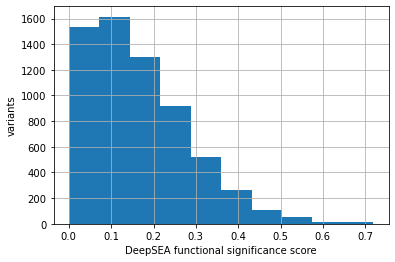

In [6]:
fig, ax = plt.subplots()
data['deepsea_Functional Significance Score'].hist(ax=ax)
ax.set_xlabel('DeepSEA functional significance score')
ax.set_ylabel('variants')
attila_utils.savefig(fig, 'deepsea-hist')

The histogram suggests a cutoff somewhere between 0.5 and 0.6 score.  I will define functionally significant variants using both a more lenient and a more stringent threshold.

### Functional variants

First let's see Taejeong's definition of functional variants

> The terms that we chose as functional are missense, stop_gained, splice_region, regulatory, and TF_binding.

### Outlier individual

In [ ]:
# TODO
#D.loc[funcAby, sel_cols].loc['CMC_MSSM_224']

In [ ]:
%connect_info